# Dataframes

**New: updated to DataFrames 0.19**

In [32]:
using DataFrames, Plots, StatsPlots, DataFramesMeta

In [33]:
df = DataFrame(
  product     = ["hardWSawnW","hardWSawnW","hardWSawnW","hardWSawnW","softWSawnW","softWSawnW","softWSawnW","softWSawnW"],
  year        = [2010,2011,2012,2013,2010,2011,2012,2013],
  production  = [120,150,170,160,100,130,165,158],
  consumption = [70,90,100,95, 80,95,110,120]
)
# or myData = CSV.read("mydatafile.csv", separator = ';')

,product,year,production,consumption
,String,Int64,Int64,Int64
1,hardWSawnW,2010,120,70
2,hardWSawnW,2011,150,90
3,hardWSawnW,2012,170,100
4,hardWSawnW,2013,160,95
5,softWSawnW,2010,100,80
6,softWSawnW,2011,130,95
7,softWSawnW,2012,165,110
8,softWSawnW,2013,158,120


## Get insights about the data:

In [34]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,product,,hardWSawnW,,softWSawnW,2,,String
2,year,2011.5,2010,2011.5,2013,,,Int64
3,production,144.125,100,154.0,170,,,Int64
4,consumption,95.0,70,95.0,120,,,Int64


In [35]:
# plot multiple groups of series
mycolours = [:green :orange] # note that the serie is piled up alphabetically

1×2 Array{Symbol,2}:
 :green  :orange

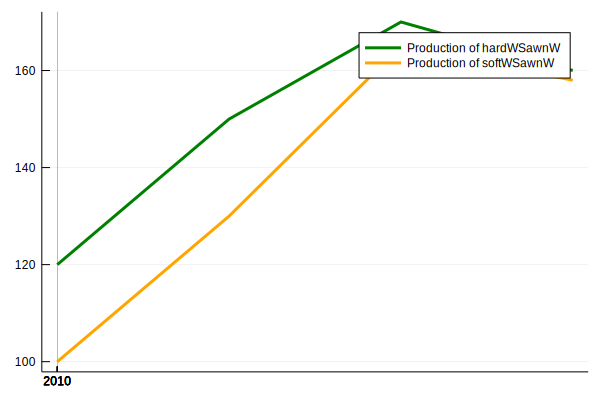

In [36]:
@df df plot(:year, :production, group=:product, linestyle = :solid, linewidth=3, label = reshape(("Production of " .* sort(unique(:product))),(1,:)), color=mycolours)

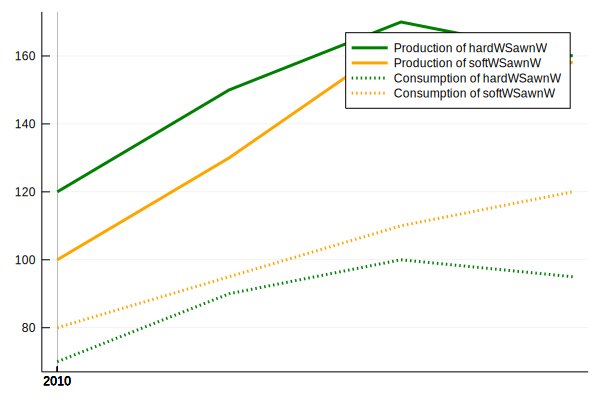

In [37]:
@df df plot!(:year, :consumption, group=:product, linestyle = :dot, linewidth=3, label = reshape(("Consumption of " .* sort(unique(:product))),(1,:)), color=mycolours)

## Edit/modify data

In [38]:
# Change a single value
df[1,:production] = 200
df

,product,year,production,consumption
,String,Int64,Int64,Int64
1,hardWSawnW,2010,200,70
2,hardWSawnW,2011,150,90
3,hardWSawnW,2012,170,100
4,hardWSawnW,2013,160,95
5,softWSawnW,2010,100,80
6,softWSawnW,2011,130,95
7,softWSawnW,2012,165,110
8,softWSawnW,2013,158,120


In [39]:
# Add an "id" column (useful for unstacking)
df.id = 1:size(df, 1) 

1:8

In [40]:
# Filter by value - boolean selection
df[df.product .== "hardWSawnW", :]

,product,year,production,consumption,id
,String,Int64,Int64,Int64,Int64
1,hardWSawnW,2010,200,70,1
2,hardWSawnW,2011,150,90,2
3,hardWSawnW,2012,170,100,3
4,hardWSawnW,2013,160,95,4


In [41]:
# Filter by value - boolean selection using comprehension
df[ [y in [2010,2011] for y in df.year], :]

,product,year,production,consumption,id
,String,Int64,Int64,Int64,Int64
1,hardWSawnW,2010,200,70,1
2,hardWSawnW,2011,150,90,2
3,softWSawnW,2010,100,80,5
4,softWSawnW,2011,130,95,6


In [42]:
# Filter by value - using the @where macro
@where(df, :year .> 2011, :product .== "hardWSawnW")

,product,year,production,consumption,id
,String,Int64,Int64,Int64,Int64
1,hardWSawnW,2012,170,100,3
2,hardWSawnW,2013,160,95,4


In [43]:
# Change a single value by filtering columns
df[ (df.product .== "hardWSawnW") .& (df.year .== 2010) , :consumption] .= 200
df

,product,year,production,consumption,id
,String,Int64,Int64,Int64,Int64
1,hardWSawnW,2010,200,200,1
2,hardWSawnW,2011,150,90,2
3,hardWSawnW,2012,170,100,3
4,hardWSawnW,2013,160,95,4
5,softWSawnW,2010,100,80,5
6,softWSawnW,2011,130,95,6
7,softWSawnW,2012,165,110,7
8,softWSawnW,2013,158,120,8


In [44]:
df = DataFrame(
  region  = ["US","US","US","US","EU","EU","EU","EU"],
  product = ["hardWSawnW","hardWSawnW","softWSawnW","softWSawnW","hardWSawnW","hardWSawnW","softWSawnW","softWSawnW"], 
  year    = [2010,2011,2010,2011,2010,2011,2010,2011],
  production  = [120,150,170,160,100,130,165,158],
  consumption = [70,90,100,95,80,95,110,120]
)

,region,product,year,production,consumption
,String,String,Int64,Int64,Int64
1,US,hardWSawnW,2010,120,70
2,US,hardWSawnW,2011,150,90
3,US,softWSawnW,2010,170,100
4,US,softWSawnW,2011,160,95
5,EU,hardWSawnW,2010,100,80
6,EU,hardWSawnW,2011,130,95
7,EU,softWSawnW,2010,165,110
8,EU,softWSawnW,2011,158,120


In [45]:
# aggregate
dfagg = aggregate(df, [:region, :product], sum)
select!(dfagg, Not([:year_sum]))

,region,product,production_sum,consumption_sum
,String,String,Int64,Int64
1,US,hardWSawnW,270,160
2,US,softWSawnW,330,195
3,EU,hardWSawnW,230,175
4,EU,softWSawnW,323,230


In [46]:
# aggregate uysing split-apply-combine
by(df, [:region,:year]) do df
    DataFrame(production = sum(df.production), consumption= sum(df.consumption))
end

,region,year,production,consumption
,String,Int64,Int64,Int64
1,US,2010,290,170
2,US,2011,310,185
3,EU,2010,265,190
4,EU,2011,288,215


In [47]:
# Compute comulative data by category using the @linq macro (that implements the split-apply-combine)
df = @linq df |>
     groupby([:region,:product]) |>
     transform(cumProduction= cumsum(:production))

,region,product,year,production,consumption,cumProduction
,String,String,Int64,Int64,Int64,Int64
1,US,hardWSawnW,2010,120,70,120
2,US,hardWSawnW,2011,150,90,270
3,US,softWSawnW,2010,170,100,170
4,US,softWSawnW,2011,160,95,330
5,EU,hardWSawnW,2010,100,80,100
6,EU,hardWSawnW,2011,130,95,230
7,EU,softWSawnW,2010,165,110,165
8,EU,softWSawnW,2011,158,120,323


## Pivot

In [48]:
# Stack - from wide to long format
longdf = stack(df,[:production,:consumption])
select!(longdf, Not([:cumProduction]))

,variable,value,region,product,year
,Symbol,Int64,String,String,Int64
1,production,120,US,hardWSawnW,2010
2,production,150,US,hardWSawnW,2011
3,production,170,US,softWSawnW,2010
4,production,160,US,softWSawnW,2011
5,production,100,EU,hardWSawnW,2010
6,production,130,EU,hardWSawnW,2011
7,production,165,EU,softWSawnW,2010
8,production,158,EU,softWSawnW,2011
9,consumption,70,US,hardWSawnW,2010


In [49]:
# Unstack - from long to wide format
#`widedf = unstack(longdf, :id, :variable, :value)`
widedf = unstack(longdf, :year, :value)

,variable,region,product,2010,2011
,Symbol,String,String,Int64⍰,Int64⍰
1,consumption,EU,hardWSawnW,80,95
2,consumption,EU,softWSawnW,110,120
3,consumption,US,hardWSawnW,70,90
4,consumption,US,softWSawnW,100,95
5,production,EU,hardWSawnW,100,130
6,production,EU,softWSawnW,165,158
7,production,US,hardWSawnW,120,150
8,production,US,softWSawnW,170,160
